## Part 1

In [256]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [257]:
stock_prices = [36.19, 36.37, 36.27, 33.51, 36.33, 35.02, 38.12, 46.61]
x_values = [int(x) for x in range(1,9)]

In [258]:
data = pd.DataFrame([x_values, stock_prices], index=['Time Period', 'Stock Price'], columns=range(1,9))

In [259]:
data

,1,2,3,4,5,6,7,8
Time Period,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00
Stock Price,36.19,36.37,36.27,33.51,36.33,35.02,38.12,46.61


In [260]:
data = pd.DataFrame({'Time Period': x_values, 'Stock Price': stock_prices})
data

,Stock Price,Time Period
0,36.19,1
1,36.37,2
2,36.27,3
3,33.51,4
4,36.33,5
5,35.02,6
6,38.12,7
7,46.61,8


## Part 2

\begin{equation}
F_{t+1} = \alpha Y_{t} + (1 - \alpha)F_t \\
where \\
F_{t+1} = forecast for the time period t + 1 \\
Y_t = time series value \\
F_t = forecast for time period t \\
\alpha = smoothing constant (between 0 and 1) \\
note: F_1 = Y_1
\end{equation}

In [209]:
# exponential smoothing function
def smoothing(alpha, t, Y, F, predict=None):
    '''
    Project smoothing exponent in graph
    '''
    global df
    global prediction
    if t[0] == 1:
        F.append(Y[0])
    
    if predict == "next":
        for period in range(len(t)):
            smooth = alpha * Y[period] + (1 - alpha) * F[period]
            F.append(smooth)
        prediction = F.pop()
    elif predict == None:
        for period in range(len(t)-1):
            smooth = alpha * Y[period] + (1 - alpha) * F[period]
            F.append(smooth)
        prediction = 0

In [210]:
# show forecast against time period on graph
def forecast(data):
    t = data['Time Period'].tolist()
    Y = data['Stock Price'].tolist()
    F = []
    
    appropriate = False
    waiting = True
    
    while not appropriate:
        alpha = float(input("Enter alpha value: "))
        smoothing(alpha, t, Y, F, 'next')
        
        # plot values on graph
        if prediction != 0:
            plt.plot('Time Period', 'Value', data=df, marker='o', markerfacecolor="blue", markersize=12, color='skyblue', linewidth=4)
            plt.plot('Time Period', 'Forecast', data=df, marker='', color='olive', linewidth=2)
            plt.scatter(9, prediction, c='g', alpha=0.5, marker='X')
            plt.xlabel('Time Period')
            plt.ylabel('Stock Prices')
            plt.legend()
            plt.show()
        
        if prediction == 0:
            plt.plot('Time Period', 'Value', data=df, marker='o', markerfacecolor="blue", markersize=12, color='skyblue', linewidth=4)
            plt.plot('Time Period', 'Forecast', data=df, marker='', color='olive', linewidth=2)
            plt.xlabel('Time Period')
            plt.ylabel('Stock Prices')
            plt.legend()
            plt.show()
        
        while waiting:
            response = input("Is this appropraite: Y or N ")
            if response == "Y":
                appropriate = True
                break
            elif response == "N":
                appropriate = False
                break
            else:
                print("Please enter right values. Either 'Y' or 'No'.")
                continue

Enter alpha value: 0.78


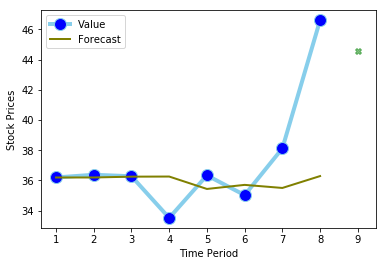

Is this appropraite: Y or N Y


In [211]:
forecast(data)

## Part 3

This is a simple linear regression problem. I am going to develop a linear regression problem to predict the forcast for the 9th period based on the forcast for the preceding periods.

A simple example of a linear equation for a linear regression model would look like this:

\begin{equation}
Y = mX + b
\end{equation}

In this case we have a simple linear regression problem so the above equation is just fine.

`Y` is the dependent variable we are trying to predict.
`X` is the independent variable that helps us predict `Y`.
`m` is the slope/gradient of the regression line which represents the change of `X` with respect to change of `Y`.
`b` refers to the constant on the y-intercept.

A linear regression model seeks to find the best line that runs through scattered points on a graph. So in our training data above we have our `X` values which is the `Time Period` and `Y` values which is the `Stock Prices`. So  what our linear regression model is going to help us estimate are the coefficients `m` and `b`. 

Coefficients can be estimated as follows;

\begin{equation}
m = \frac{\sum((X_i - \bar X) * (Y_i - \bar Y))}{\sum((X_i - \bar X)^2)}
\end{equation}

\begin{equation}
m = \frac{covariance(x, y)}{variance(x)}
\end{equation}

\begin{equation}
b = \bar Y - m * \bar X
\end{equation}

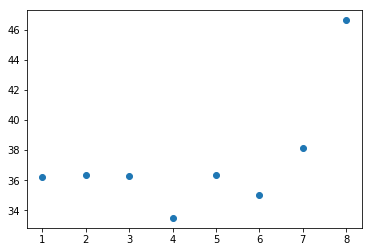

In [261]:
X = data['Time Period'].tolist()
Y = data['Stock Price'].tolist()
data = list(zip(X, Y))
plt.scatter(X, Y)

Based on the above equations, a mean of the input and output variables will be needed for further computing.

In [272]:
def mean(points):
    '''
    Calculate the mean of data points
    '''
    return sum(points) / len(points)

In [273]:
def variance(points, mean):
    '''
    Calculate the variance of points
    '''
    return sum([pow((x - mean), 2) for x in points])

In [274]:
# testing mean and variance functions
x = [1,2,3,4,5,6,7,8,9]
y = [9,8,7,6,5,4,3,2,1]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=5.000 variance=60.000
y stats: mean=5.000 variance=60.000


Now that our simple functions are working like we want them to, we need to calculate the covariance.

\begin{equation}
\sum((X_i - \bar X) * (Y_i - \bar Y))
\end{equation}

In [275]:
def covariance(X, X_mean, Y, Y_mean):
    '''
    Calculate the covariance of data points
    '''
    cova = 0.0
    for i in range(len(X)):
        cova += (X[i] - X_mean) * (Y[i] - Y_mean)
    return cova

In [276]:
# testing covariance function
x = [1,2,4,3,5]
y = [1,3,3,2,5]
x_mean, y_mean = mean(x), mean(y)
cova = covariance(x, x_mean, y, y_mean)
print('Covariance: %.3f' % (cova))

Covariance: 8.000


The next thing we need is to find the y-intercept of the line which is `b`. This simply the mean of `Y` minus gradient multiplied by the mean of `X`. Since we have all the building blocks ready, all we need to do is calculate our coefficients.

In [277]:
def coefficients(data):
    X = [row[0] for row in data]
    Y = [row[1] for row in data]
    X_mean, Y_mean = mean(X), mean(Y)
    m = covariance(X, X_mean, Y, Y_mean) / variance(X, X_mean)
    b = Y_mean - (m * X_mean)
    return m, b

In [278]:
m, b = coefficients(data)
print('Coefficients: m=%.3f, b=%.3f' % (m, b))

Coefficients: m=0.961, b=32.976


Based on the coefficients estimates we have a simple linear equation like this:

\begin{equation}
Y = 0.961X + 32.976
\end{equation}

In [281]:
def simple_linear_regression(train, test):
    predictions = []
    m, b = coefficients(train)
    for row in test:
        Y = m * row[0] + b
        predictions.append(Y)
    return predictions

In [288]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    global predicted
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [289]:
rmse = evaluate_algorithm(data, simple_linear_regression)
print("RMSE: %.3f" % (rmse))

0.9614285714285715 32.97607142857143
[33.9375, 34.89892857142857, 35.86035714285715, 36.82178571428572, 37.78321428571429, 38.74464285714286, 39.706071428571434, 40.667500000000004]
RMSE: 3.004


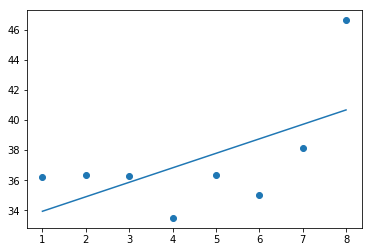

In [294]:
plt.scatter(X, Y)
plt.plot(X, predicted)
# plt.plot('Time Period', 'regression', data=data, marker='o', markerfacecolor="blue", markersize=12, color='skyblue', linewidth=4)

Lets predict for period 9 based on the liear regression coefficients

In [299]:
Y = 0.961 * 9 + 32.976
print("Period 9 stock price would be, %.3f" % (Y))

Period 9 stock price would be, 41.625
